In [1]:
# import lib
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_circles

# n_samples
n_sample = 10000
# create circles
x , y = make_circles(n_samples = n_sample,
                    noise = 0.03,
                    random_state=42)
x.shape , y.shape

((10000, 2), (10000,))

In [3]:
# let's make pandas
df_circles = pd.DataFrame(x,y)
df_circles.head()

,0,1
1,0.046469,0.824778
0,1.005063,-0.433352
0,-0.583484,0.794528
0,0.984783,-0.325179
0,0.829930,-0.547223


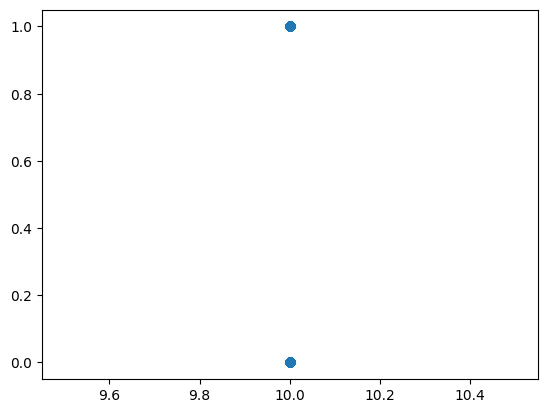

In [4]:
import matplotlib.pyplot as plt
plt.scatter(tf.constant(10, shape=(10000,)), y)

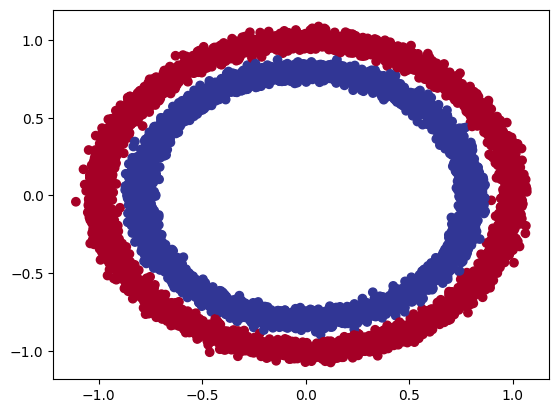

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

### plot decision boundry function


In [6]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

### Our data


In [7]:
# let's split our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test

(array([[ 0.20288308, -1.00810296],
        [-0.17170415, -0.97504274],
        [ 0.55648102,  0.54398822],
        ...,
        [-0.00736033,  0.75688484],
        [ 0.40335521, -0.69940714],
        [-0.95321274,  0.22164526]]),
 array([[-0.75923759,  0.24935606],
        [-0.41382658, -0.63224298],
        [ 0.86740801, -0.47398194],
        ...,
        [-0.48913008,  0.86007026],
        [-1.01307441, -0.21493973],
        [-0.69781425, -0.73425258]]),
 array([0, 0, 1, ..., 1, 1, 0]),
 array([1, 1, 0, ..., 0, 0, 0]))

### First model

In [8]:
# let's create pur model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# let's compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# let's fit our model
hist = model_1.fit(tf.constant(x_train), tf.constant(y_train), epochs=25)


Epoch 1/25
250/250 [==============================] - 8s 5ms/step - loss: 0.7027 - accuracy: 0.4845
Epoch 2/25
250/250 [==============================] - 1s 5ms/step - loss: 0.6940 - accuracy: 0.4728
Epoch 3/25
250/250 [==============================] - 1s 4ms/step - loss: 0.6903 - accuracy: 0.5102
Epoch 4/25
250/250 [==============================] - 1s 6ms/step - loss: 0.6877 - accuracy: 0.5192
Epoch 5/25
250/250 [==============================] - 1s 4ms/step - loss: 0.6845 - accuracy: 0.5544
Epoch 6/25
250/250 [==============================] - 2s 6ms/step - loss: 0.6796 - accuracy: 0.5791
Epoch 7/25
250/250 [==============================] - 2s 8ms/step - loss: 0.6715 - accuracy: 0.5731
Epoch 8/25
250/250 [==============================] - 2s 6ms/step - loss: 0.6597 - accuracy: 0.5895
Epoch 9/25
250/250 [==============================] - 1s 5ms/step - loss: 0.6461 - accuracy: 0.6191
Epoch 10/25
250/250 [==============================] - 1s 6ms/step - loss: 0.6325 - accuracy: 0.6472

In [9]:
hist.history

{'loss': [0.7027000784873962,
  0.6940399408340454,
  0.6903407573699951,
  0.687746524810791,
  0.6845481395721436,
  0.6795831918716431,
  0.6714662313461304,
  0.6596576571464539,
  0.646118700504303,
  0.6325070858001709,
  0.6186865568161011,
  0.6043164134025574,
  0.5868629217147827,
  0.56745845079422,
  0.5539150834083557,
  0.5425383448600769,
  0.5325066447257996,
  0.523722767829895,
  0.5155659914016724,
  0.5083483457565308,
  0.5014982223510742,
  0.4954227805137634,
  0.4889424443244934,
  0.48257604241371155,
  0.4762738347053528],
 'accuracy': [0.484499990940094,
  0.4727500081062317,
  0.5102499723434448,
  0.5192499756813049,
  0.5543749928474426,
  0.5791249871253967,
  0.5731250047683716,
  0.5895000100135803,
  0.6191250085830688,
  0.6472499966621399,
  0.6552500128746033,
  0.6759999990463257,
  0.6892499923706055,
  0.706375002861023,
  0.7197499871253967,
  0.7263749837875366,
  0.734000027179718,
  0.7381250262260437,
  0.7444999814033508,
  0.74887502193450

<Axes: >

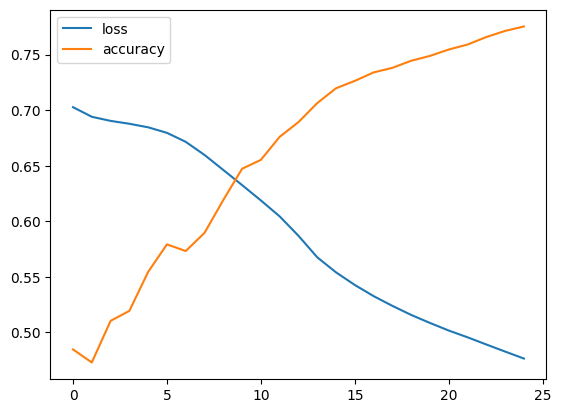

In [10]:
# Plot the loss curves
pd.DataFrame(hist.history).plot()

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


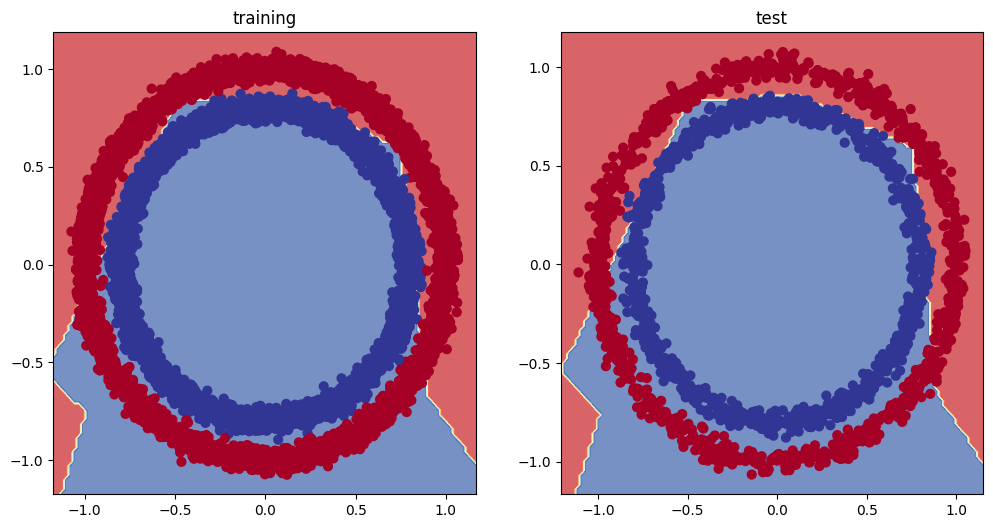

In [11]:
# plot decision bounrdy
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('training')
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1, x_test, y_test)
plt.show()


### Best model with lr = 0.001


In [12]:
# let's create pur model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# let's compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# callback learning rate
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

# let's fit our model
hist = model_2.fit(tf.constant(x_train), tf.constant(y_train), epochs=40,
                   callbacks=[lr_schedular])

Epoch 1/40
250/250 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.5035 - lr: 1.0000e-04
Epoch 2/40
250/250 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/40
250/250 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5094 - lr: 1.2589e-04
Epoch 4/40
250/250 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5132 - lr: 1.4125e-04
Epoch 5/40
250/250 [==============================] - 1s 4ms/step - loss: 0.6876 - accuracy: 0.5171 - lr: 1.5849e-04
Epoch 6/40
250/250 [==============================] - 1s 4ms/step - loss: 0.6866 - accuracy: 0.5206 - lr: 1.7783e-04
Epoch 7/40
250/250 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5234 - lr: 1.9953e-04
Epoch 8/40
250/250 [==============================] - 1s 3ms/step - loss: 0.6843 - accuracy: 0.5294 - lr: 2.2387e-04
Epoch 9/40
250/250 [==============================] - 1s 3ms/ste

<Axes: xlabel='epochs'>

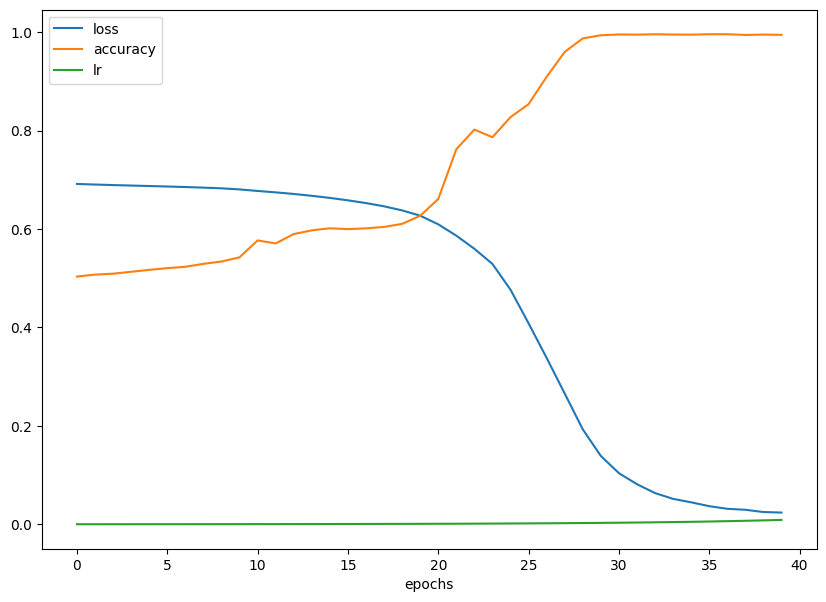

In [13]:
# Checkout the history
pd.DataFrame(hist.history).plot(figsize=(10,7), xlabel="epochs")

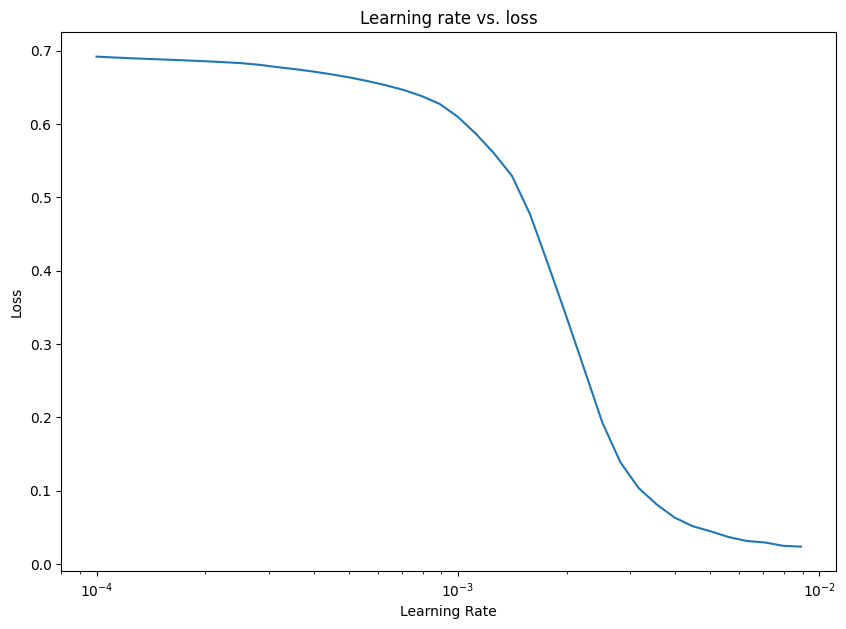

In [14]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

### classifiaction evaluation methods


In [15]:
# confusion matrix
from sklearn.metrics import confusion_matrix
# make predictions
y_pred = model_2.predict(tf.constant(x_test))
y_pred, y_test

63/63 [==============================] - 0s 2ms/step


(array([[9.9986100e-01],
        [9.9996126e-01],
        [1.2610921e-03],
        ...,
        [2.3540021e-03],
        [3.9595320e-06],
        [1.6188843e-04]], dtype=float32),
 array([1, 1, 0, ..., 0, 0, 0]))

In [16]:
# Here y_test is binary so we will convert pred to binary
y_pred = tf.round(y_pred)
y_pred

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [17]:
# let's get confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
cm, cm.sum(axis=1)[:,np.newaxis]

(array([[1007,    6],
        [   4,  983]]),
 array([[1013],
        [ 987]]))

### make plot function for confusion mtrix
  

In [18]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = False, figsize=(10,10), text_size=15) :
  # create confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  # normalize our cm
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

  # let's pretty our plot
  fig, ax = plt.subplots(figsize=figsize)
  # create mat plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(cm.shape[0]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=labels,
        yticklabels=labels)

  # # Set x-axis labels to bottom
  # ax.xaxis.set_label_position("bottom")
  # ax.xaxis.tick_bottom()

  # # Adjust label size
  # ax.xaxis.label.set_size(20)
  # ax.yaxis.label.set_size(20)
  # ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

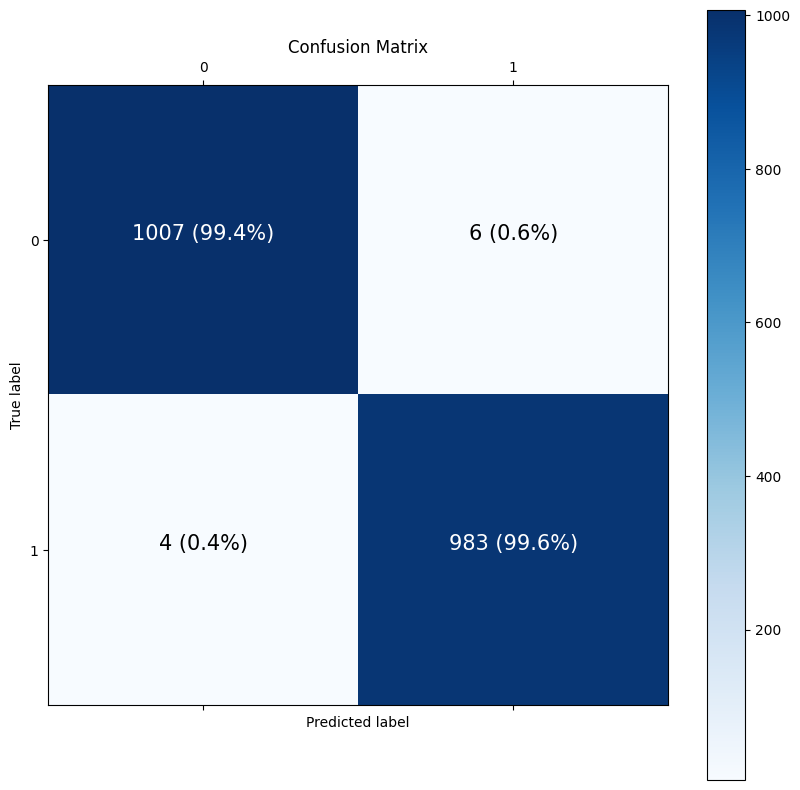

In [19]:
# let's check on ocnfusio nmatridx plot function
cm_pretty =  make_confusion_matrix(y_true = y_test, y_pred = y_pred )

### Let's load our datat set from temnsor keras `fashion mnist` Data set

In [20]:
# import our fashion mnsit data set
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# get our data
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

# get calssese names of our labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# let's show first trinaing
test_data.shape, test_labels.shape, train_data.shape

((10000, 28, 28), (10000,), (60000, 28, 28))

Text(0.5, 1.0, 'Ankle boot')

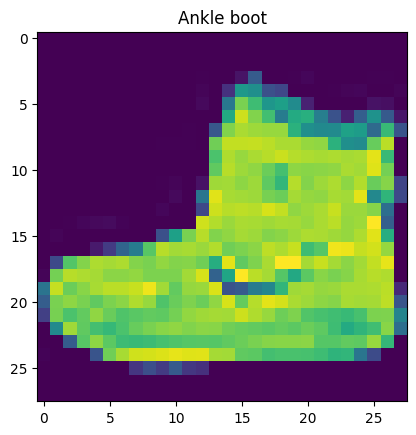

In [21]:
# plot sinngle sampplle
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.title(class_names[train_labels[0]])


### Let's create our model

In [22]:
# set random seed
tf.random.set_seed(42)

# create our model
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data[0].shape),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# compile our model
model_fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

# fit our model
fashion_hist_non_norm = model_fashion.fit(train_data, train_labels, epochs = 10,
                                 validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3319 - accuracy: 0.1300 - val_loss: 2.1292 - val_accuracy: 0.1782
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9279 - accuracy: 0.2044 - val_loss: 1.8442 - val_accuracy: 0.1875
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7499 - accuracy: 0.2354 - val_loss: 1.7024 - val_accuracy: 0.2480
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6603 - accuracy: 0.2810 - val_loss: 1.6392 - val_accuracy: 0.3072
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5965 - accuracy: 0.3270 - val_loss: 1.5974 - val_accuracy: 0.3153
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5389 - accuracy: 0.3504 - val_loss: 1.5526 - val_accuracy: 0.3440
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5055 - accuracy: 0.3618 - val_loss: 1.5119 - val_accuracy:

### let's normalize our data

In [23]:
# train_data.max(), tf.reduce_min(train_data).numpy()
# let's normalize our data
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()
train_data_norm.shape, test_data_norm.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:


# set random seed
tf.random.set_seed(42)

# create our model
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data[0].shape),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# compile our model
model_fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

# fit our model
fashion_hist_norm = model_fashion.fit(train_data_norm, train_labels, epochs = 10,
                                 validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5796 - accuracy: 0.3892 - val_loss: 61.0048 - val_accuracy: 0.4107
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1781 - accuracy: 0.5350 - val_loss: 75.0742 - val_accuracy: 0.3958
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1000 - accuracy: 0.5499 - val_loss: 94.0099 - val_accuracy: 0.3798
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9973 - accuracy: 0.6168 - val_loss: 122.1453 - val_accuracy: 0.5212
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8307 - accuracy: 0.7185 - val_loss: 125.7580 - val_accuracy: 0.5867
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7653 - accuracy: 0.7416 - val_loss: 133.1841 - val_accuracy: 0.5920
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7358 - accuracy: 0.7486 - val_loss: 126.2643 - va

<Axes: title={'center': 'norm'}>

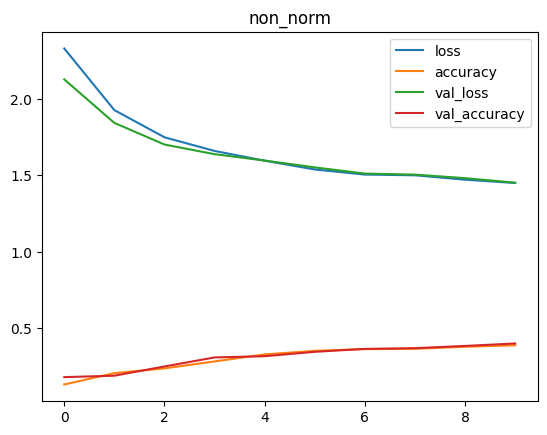

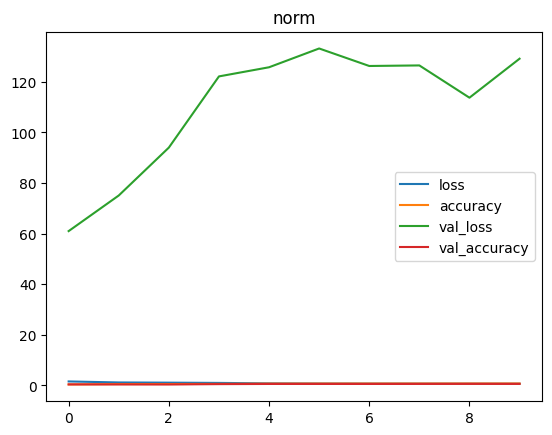

In [25]:
# let's plot normalized and non normalized
import pandas as pd
pd.DataFrame(fashion_hist_non_norm.history).plot(title='non_norm')
pd.DataFrame(fashion_hist_norm.history).plot(title='norm')

In [26]:
# Let's create model callback of lr
# set random seed
tf.random.set_seed(42)

# create our model
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data[0].shape),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# compile our model
model_fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

# lr scheduar
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# fit our model
fashion_hist_lr = model_fashion.fit(train_data_norm, train_labels, epochs = 40,
                                 validation_data = (test_data, test_labels),
                                      callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8938 - accuracy: 0.3176 - val_loss: 132.2926 - val_accuracy: 0.3436 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4106 - accuracy: 0.5322 - val_loss: 86.9106 - val_accuracy: 0.5266 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1298 - accuracy: 0.6465 - val_loss: 86.4987 - val_accuracy: 0.6370 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0064 - accuracy: 0.6704 - val_loss: 89.4000 - val_accuracy: 0.6454 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9318 - accuracy: 0.6948 - val_loss: 90.4052 - val_accuracy: 0.6533 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8702 - accuracy: 0.7196 - val_loss: 91.8653 - val_accuracy: 0.6524 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [=====

In [27]:
fashion_hist_lr.history

{'loss': [1.8937737941741943,
  1.4106028079986572,
  1.1298372745513916,
  1.0063626766204834,
  0.9317831993103027,
  0.8701656460762024,
  0.8158451318740845,
  0.7664997577667236,
  0.7254816889762878,
  0.6927163600921631,
  0.6664564609527588,
  0.645393967628479,
  0.6283916234970093,
  0.6134124994277954,
  0.5999494791030884,
  0.5871526598930359,
  0.5753372311592102,
  0.5652215480804443,
  0.5558786988258362,
  0.5480583906173706,
  0.5396736860275269,
  0.5343560576438904,
  0.5301418304443359,
  0.5261396765708923,
  0.5211486220359802,
  0.5230217576026917,
  0.5197359919548035,
  0.5183500051498413,
  0.5159031748771667,
  0.5203274488449097,
  0.5203016996383667,
  0.5208169221878052,
  0.5212803483009338,
  0.5222613215446472,
  0.5257744193077087,
  0.5261121988296509,
  0.5279064178466797,
  0.5324128866195679,
  0.5353768467903137,
  0.5383175611495972],
 'accuracy': [0.31755000352859497,
  0.5322166681289673,
  0.6465499997138977,
  0.6704333424568176,
  0.6947666

Text(0, 0.5, 'loss')

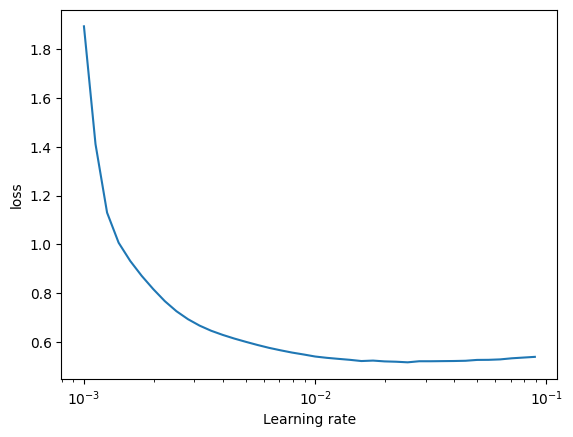

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# let's shos best lr
lrs = 1e-3 * 10 **(np.arange(40)/20)
plt.semilogx(lrs, fashion_hist_lr.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')


In [29]:
# let's make predictions
y_pred = model_fashion(test_data_norm)
y_pred, test_labels

(<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
 array([[1.9145958e-04, 2.5901961e-04, 2.4173612e-05, ..., 8.0704823e-02,
         3.3623807e-04, 7.8932816e-01],
        [1.3603817e-03, 1.9601069e-10, 8.7103176e-01, ..., 0.0000000e+00,
         2.5128654e-06, 0.0000000e+00],
        [1.0701437e-05, 9.9951625e-01, 6.3097779e-08, ..., 1.4131639e-27,
         1.9317192e-10, 2.3449896e-36],
        ...,
        [1.7014340e-01, 7.4089743e-04, 1.9103651e-01, ..., 6.8100161e-12,
         8.1089377e-02, 3.4825272e-14],
        [3.7085476e-06, 9.9772733e-01, 1.8683413e-07, ..., 1.9947856e-19,
         6.7069722e-10, 2.3728772e-23],
        [7.5550066e-05, 8.7321196e-06, 3.2608878e-05, ..., 2.1896418e-02,
         1.6461348e-02, 2.4377255e-04]], dtype=float32)>,
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [37]:
# converts preditons to test labels
tf.argmax(y_pred, axis=1), y_pred.shape, test_labels.shape, test_labels

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 6, 1, 5])>,
 TensorShape([10000, 10]),
 (10000,),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

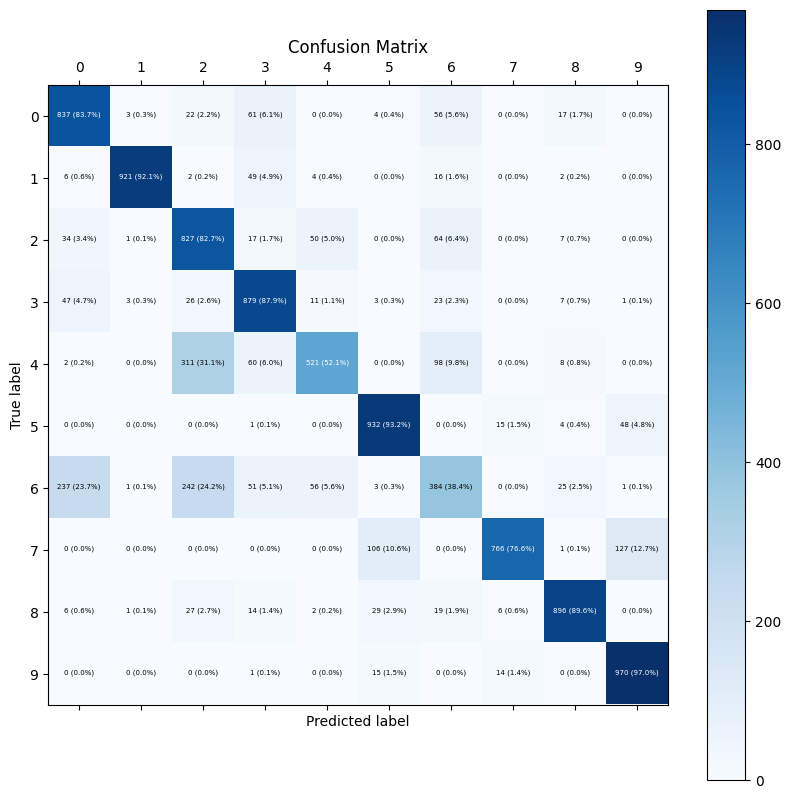

In [31]:
# plot confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = tf.argmax(y_pred, axis=1),
                      classes= class_names,
                      text_size = 5)

### Let's create function plot random image

In [32]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 18ms/step


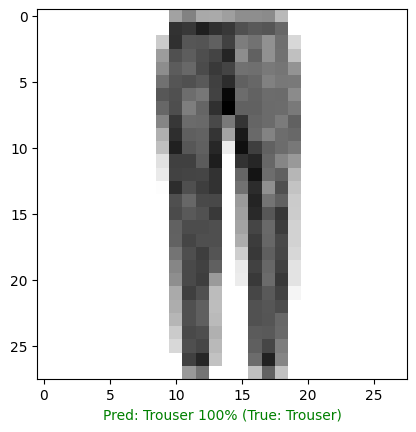

In [42]:
# let's get plot
# train_data_norm.shape, test_labels.shape
plot_random_image(model_fashion, test_data_norm, test_labels, class_names)